# Self driving car nanodegree
## Project 3: Traffic sign classifier

This project consists on a deep neural network capable of determine what kind of traffic sign is presented to it. Specifically it classifies the german traffic signs. For training, validation and testing of the network the German Traffic Sign Dataset is used.

### Load the data

The first step in order to create a neural network is to load the data that will be used for training, validation and testing. In this case, the dataset used is the German Traffic Sign Dataset, which is saved on the folder "TrainData" as pickle files.

In [1]:
# Load pickle module
import pickle
import cv2
import numpy as np

trainFile = 'TrainData/train.p'
validationFile = 'TrainData/valid.p'
testFile = 'TrainData/test.p'

with open(trainFile, mode='rb') as file:
    trainData = pickle.load(file)
with open(validationFile, mode='rb') as file:
    validationData = pickle.load(file)
with open(testFile, mode='rb') as file:
    testData = pickle.load(file)
    
trainData_X, trainData_y = trainData['features'], trainData['labels']
validationData_X, validationData_y = validationData['features'], validationData['labels']
testData_X, testData_y = testData['features'], testData['labels']

# It verifies if the images and the labels have the same length
assert(len(trainData_X) == len(trainData_y))
assert(len(validationData_X) == len(validationData_y))
assert(len(testData_X) == len(testData_y))


### Visualization of the data
Once the data is loaded, it is time to inspect it, in order to know what are we working with. First, let's extract some important information from it.

In [2]:
import numpy as np

# Number of training samples
trainData_quantity = trainData_X.shape[0]

# Number of validation samples
validationData_quantity = validationData_X.shape[0]

# Number of test samples
testData_quantity = testData_X.shape[0]

# Image shape
imagesShape = (trainData_X.shape[1], trainData_X.shape[2], trainData_X.shape[3])

# How many unique classes/labels there are in the dataset.
Labels_quantity = len(np.unique(trainData_y))

print("Number of training examples =", trainData_quantity)
print("Number of testing examples =", testData_quantity)
print("Number of validation examples =", validationData_quantity)
print("Image data shape =", imagesShape)
print("Number of classes =", Labels_quantity)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


Now it is time to visualize the data by printing some of them:

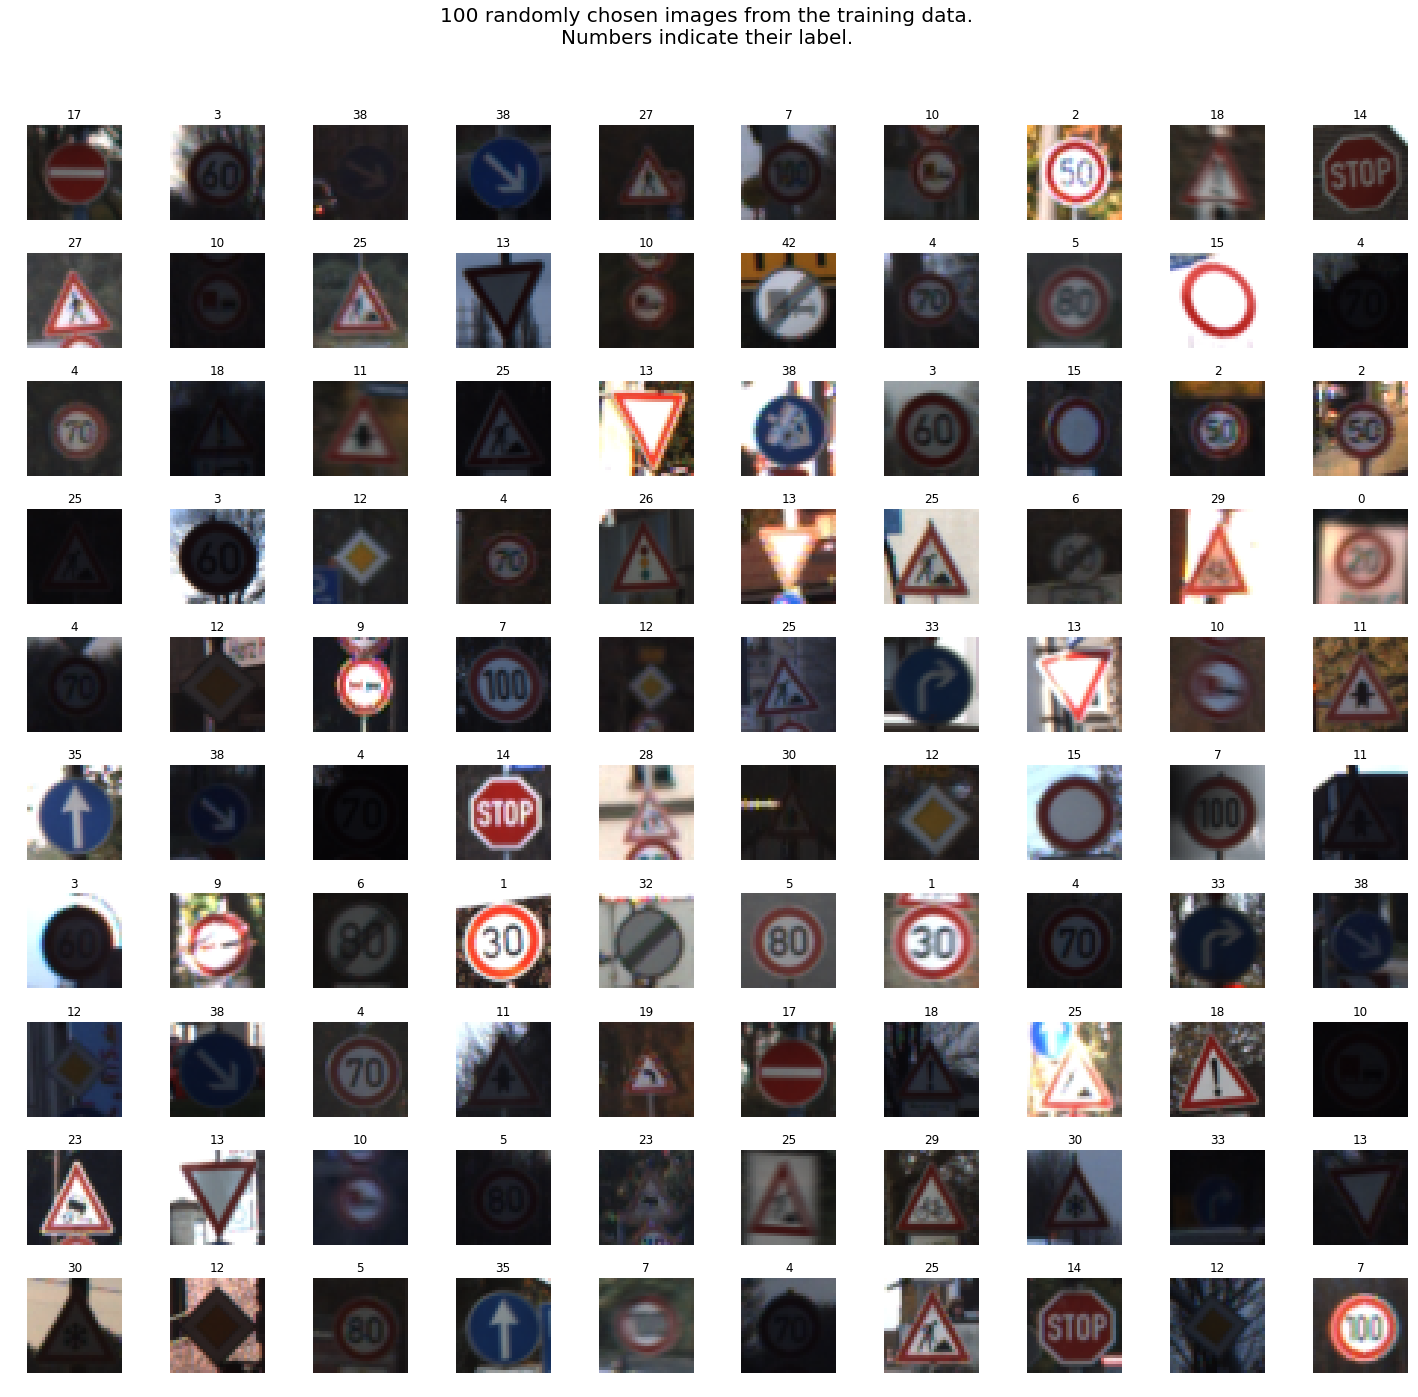

In [3]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

figure1, fig1_axes = plt.subplots(10, 10, figsize =(20,20))
figure1.tight_layout()
figure1.suptitle('100 randomly chosen images from the training data.\nNumbers indicate their label.', 
                 fontsize = 20)
fig1_axes = fig1_axes.flatten()
for ax in fig1_axes:
    imgIndex = random.randint(0, trainData_quantity-1)
    ax.imshow(trainData_X[imgIndex], cmap = 'gray')
    ax.set_title(trainData_y[imgIndex])
    ax.axis('off')
figure1.subplots_adjust(top = 0.9, bottom = 0.03)
figure1.savefig('ImgsReport/01_100RandomTrainData')

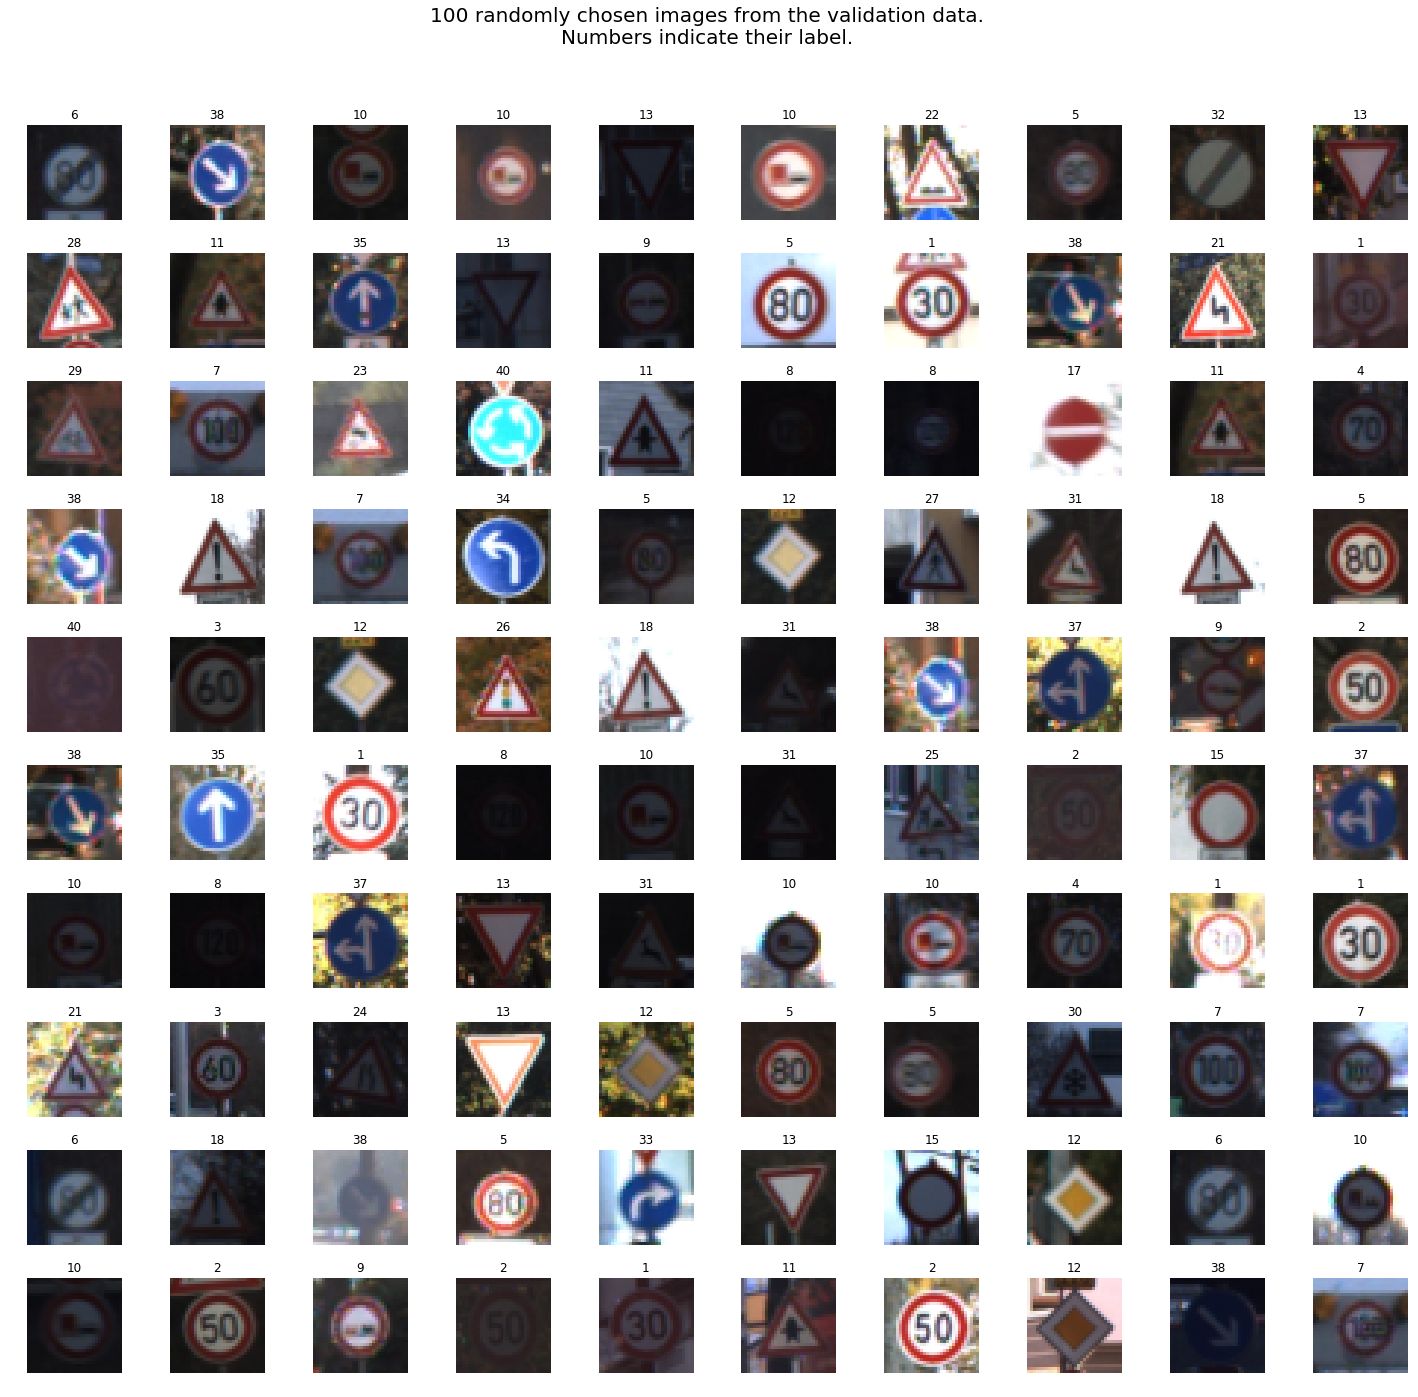

In [4]:
figure2, fig2_axes = plt.subplots(10, 10, figsize =(20,20))
figure2.tight_layout()
figure2.suptitle('100 randomly chosen images from the validation data.\nNumbers indicate their label.', 
                 fontsize = 20)
fig2_axes = fig2_axes.flatten()
for ax in fig2_axes:
    imgIndex = random.randint(0, validationData_quantity-1)
    ax.imshow(validationData_X[imgIndex], cmap = 'gray')
    ax.set_title(validationData_y[imgIndex])
    ax.axis('off')
figure2.subplots_adjust(top = 0.9, bottom = 0.03)
figure2.savefig('ImgsReport/02_100RandomValidationData')

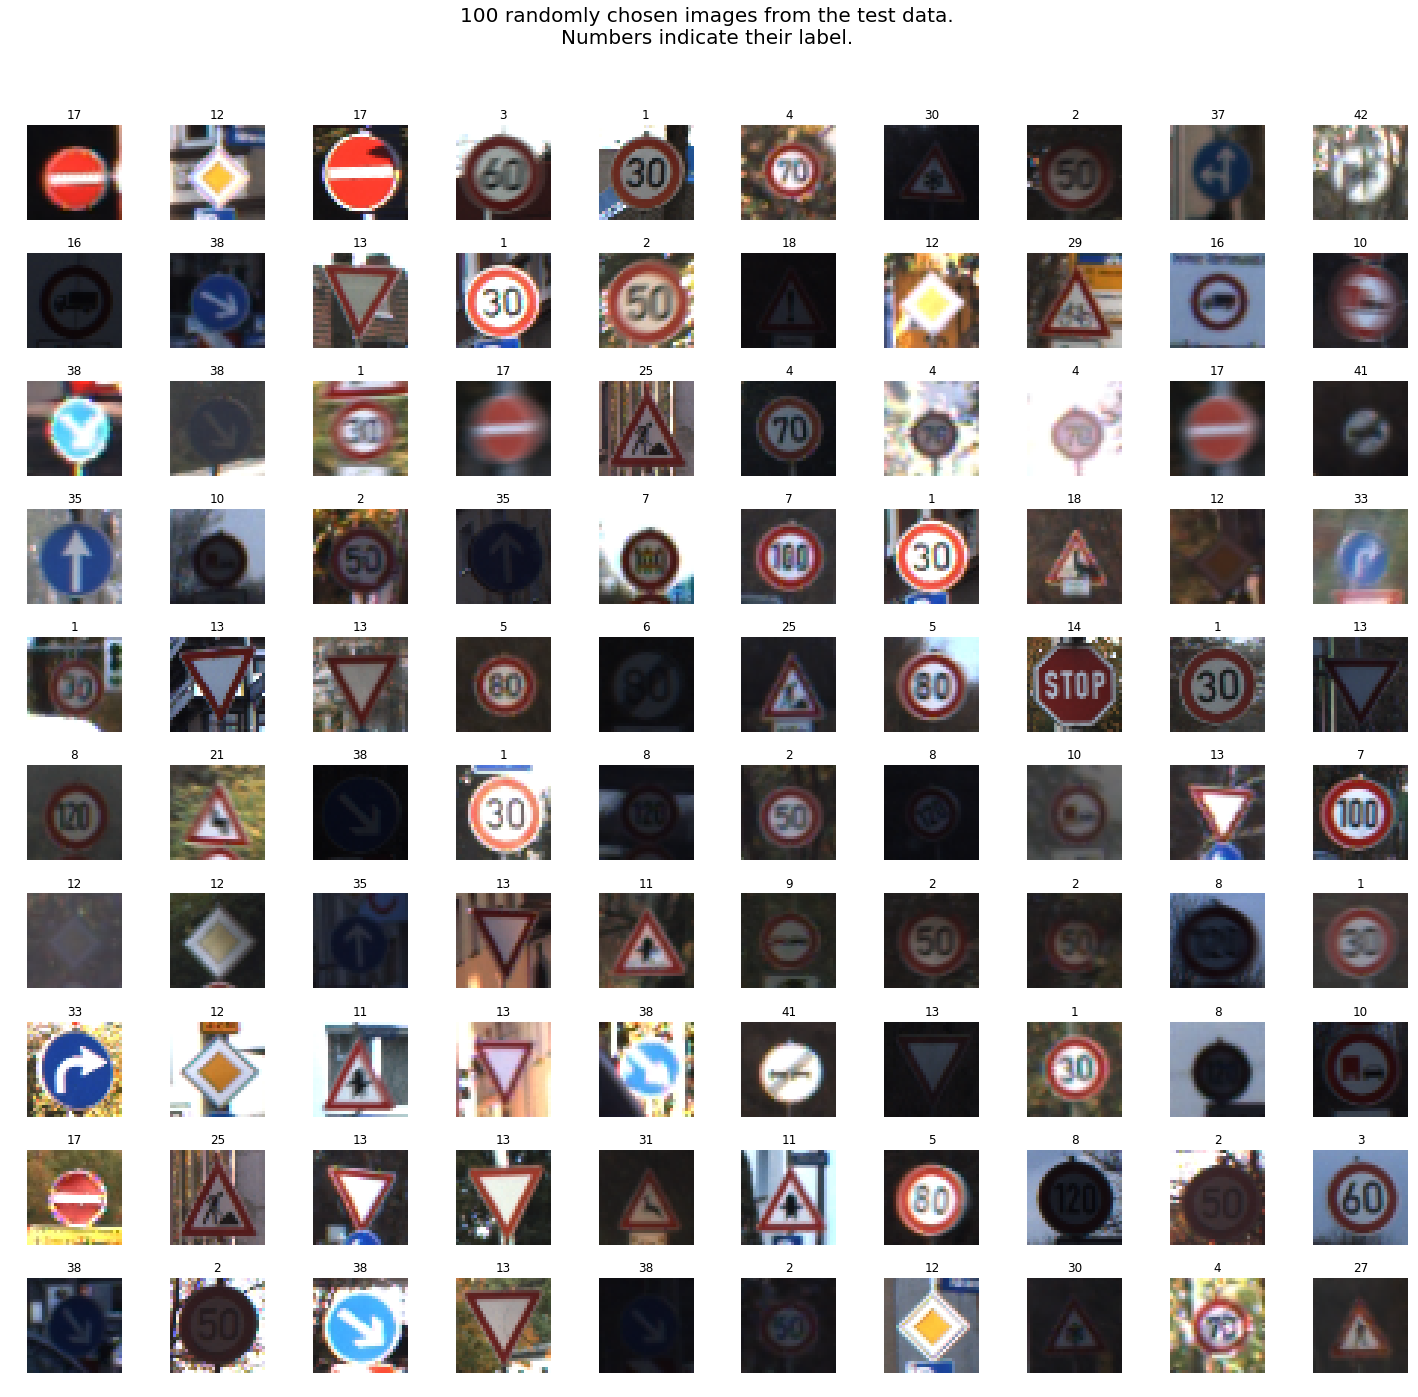

In [5]:
figure3, fig3_axes = plt.subplots(10, 10, figsize =(20,20))
figure3.tight_layout()
figure3.suptitle('100 randomly chosen images from the test data.\nNumbers indicate their label.', 
                 fontsize = 20)
fig3_axes = fig3_axes.flatten()
for ax in fig3_axes:
    imgIndex = random.randint(0, testData_quantity-1)
    ax.imshow(testData_X[imgIndex])
    ax.set_title(testData_y[imgIndex])
    ax.axis('off')
figure3.subplots_adjust(top = 0.9, bottom = 0.03)
figure3.savefig('ImgsReport/03_100RandomTestData')

By printing 100 randomly chosen images from the train, validation and test data, it can be seen that the images are taken in different light conditions, different perspectives and different sharpness levels. Some images have stickers ore some other perturbations as well. So it is a good dataset to start with. 

Let's now analyze how many images are from every class on the three datasets:

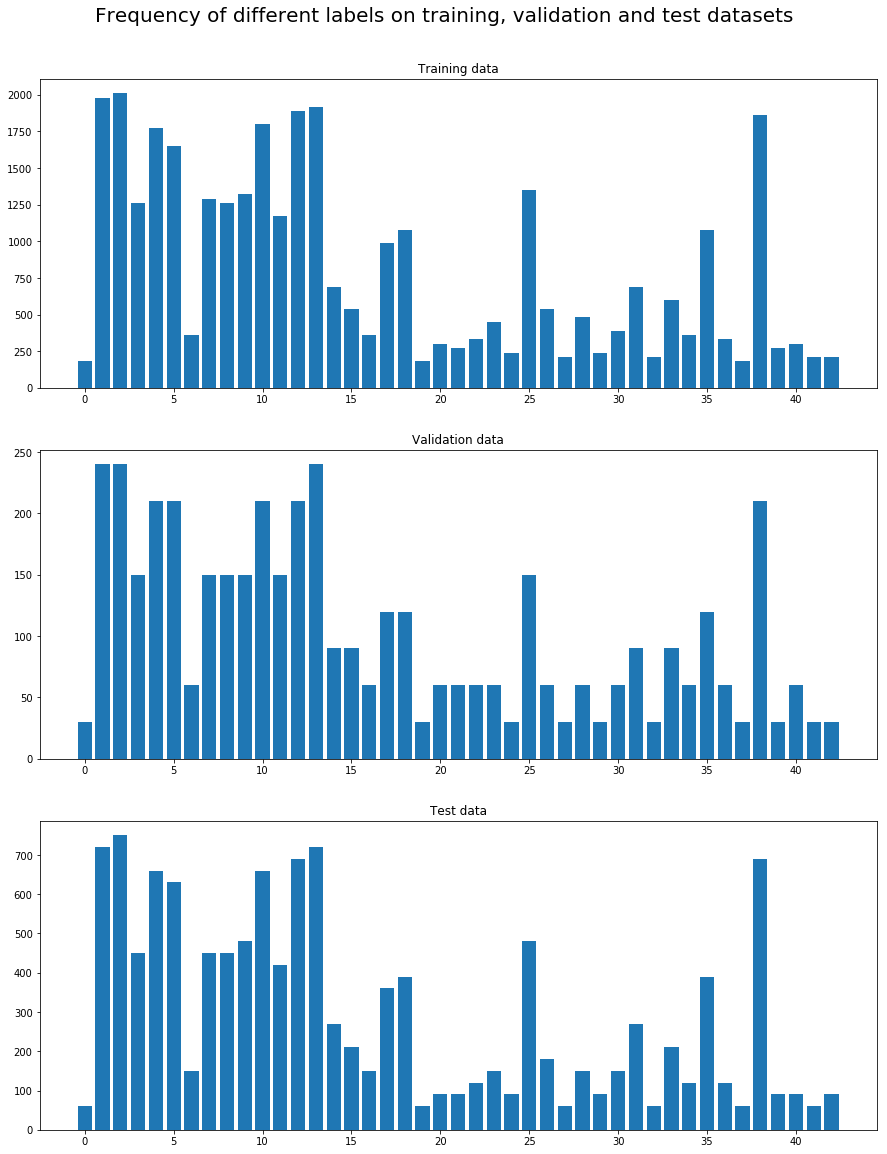

In [6]:
# Array from 0 to "Labels_quantity-1" used to determine how many data are from every kind of traffic sign on the 
# three datasets
labelsIdentifier = np.linspace(0, Labels_quantity-1, Labels_quantity)
trainData_qtLabels = np.histogram(trainData_y, bins = Labels_quantity)
validationData_qtLabels = np.histogram(validationData_y, bins = Labels_quantity)
testData_qtLabels = np.histogram(testData_y, bins = Labels_quantity)
# plt.bar(labelsIdentifier, trainData_qtLabels[0])

figure4, fig4_axes = plt.subplots(3, 1, figsize =(15,20))
figure4.suptitle('Frequency of different labels on training, validation and test datasets', 
                 fontsize = 20)
fig4_axes[0].bar(labelsIdentifier, trainData_qtLabels[0])
fig4_axes[0].set_title('Training data')
fig4_axes[0].set_xticks(np.arange(0, Labels_quantity-1, step = 5))
fig4_axes[1].bar(labelsIdentifier, validationData_qtLabels[0])
fig4_axes[1].set_title('Validation data')
fig4_axes[1].set_xticks(np.arange(0, Labels_quantity-1, step = 5))
fig4_axes[2].bar(labelsIdentifier, testData_qtLabels[0])
fig4_axes[2].set_title('Test data')
fig4_axes[2].set_xticks(np.arange(0, Labels_quantity-1, step = 5))

figure4.subplots_adjust(top = 0.93, bottom = 0.20)
figure4.savefig('ImgsReport/04_LabelsFrequency')

From the three plots can be seen that the images are almost equally distribuited on the train, validation and test datasets. 

It can also be seen that some signs are more frequent than other. The speed limits from 30 km/h to 80 km/h (labels from 1 to 5) are more frequent than the speed limit 20 km/h (label 0). The end of speed limit 80 km/h is also not that frequent (label 6). The speed limits 100 km/ and 120 km/h (label 7 and 8) are also very frequent, but not that much like the lower ones. This can result that the neural network will be more prepared to recognize speed limit trafic signs between 30 km/h and 80 km/h than to 20 km/h, because it will have more exposition to these ones. 

A similar situation can occur with the sign "No passing for vehicles over 3.5 metric tons", which is also very frequent (label 10), more than the normal "No passing" sign (label 9). 

Other situation like that is between the signs "Keep right" (label 38) and "Keep left" (label 39). The "keep right" sign is way more frequent than the "keep left" one. That can result on "Keep left" images being recognized as "Keep right" since they are very similar. 

### Preprocessing of the data
The next step is to preprocess the data in order to be used to train, validate and test the neural network. These preprocessing consist on normalizing the images, so their values are between -1 and 1. Note that this processing is done for all three color channels of the images.

This normalization is done in order to get a good conditioned dataset which performs well with the optimizer used to train the neural network. A bad conditioned dataset could result on overflows while doing the optimization.

In [4]:
# Function to normalize images from range (0, 255) to another range. The default normalized range is between 
# -1 and 1, so the image data have a mean of 0 and a standard deviation of 1.

def normalizeRGBImage(image, normRange = (-1, 1)):
    normalizedImage = np.zeros_like(image)
    normalizedMinMatrix = np.full_like(image, normRange[0], dtype = np.float32)
    inputMin = 0
    inputMax = 255
    inputMinMatrix = np.full_like(image, inputMin, dtype = np.float32)
    slope = (normRange[1] - normRange[0])/(inputMax - inputMin)
    normalizedImage = (image - inputMinMatrix)*slope + normalizedMinMatrix
    return normalizedImage

normTrainData_X = normalizeRGBImage(trainData_X)
normValidationData_X = normalizeRGBImage(validationData_X)
normTestData_X = normalizeRGBImage(testData_X)

### Augmentation of the data

The next step would be to augment the data doing translations, rotations, zooms, etc. This is done in order to have a more diverse dataset which makes the neural network learn the signs even if the position or size is different than it should be, making it more robust. 

In this project, two neural networks will be programmed, one without data augmentation and another one with data augmentation, so it can be seen how different they perform.

### Selection and creation of a model
The Yann LeCunn's LeNet-5 neural network was selected as a starting point for the neural network arquitecture. This network was developed by Yann LeCunn to classify handwritten numbers from 0 to 9, but it can be easilly used for other image classification tasks. 

The original LeNet-5 network consisted of the following layers:

- Convolution layer with input size 32x32x1 and output size 28x28x6. Kernel size of 5x5 and stride of 1. 
- Average pooling layer with input size 28x28x6 and output size 14x14x6. Kernel size of 2x2 and stride of 2.
- Convolution layer with input size 14x14x6 and output size 10x10x16. Kernel size of 5x5 and stride of 1.
- Average pooling layer with input size of 10x10x16 and output size of 5x5x16. Kernel size of 2x2 and stride of 2.
- Convolution layer with input size of 5x5x16 and output 1x1x120. Kernel size of 5x5 and stride of 1.
- Fully connected layer with input size of 120 and output size of 84.
- Fully connected layer with input size of 84 and output size of 10.

Between all internal layers the activation function hyperbolic tangent (tanh) was used. 

This structure can be explained with the following image (Original Image published in [LeCun et al., 1998] )

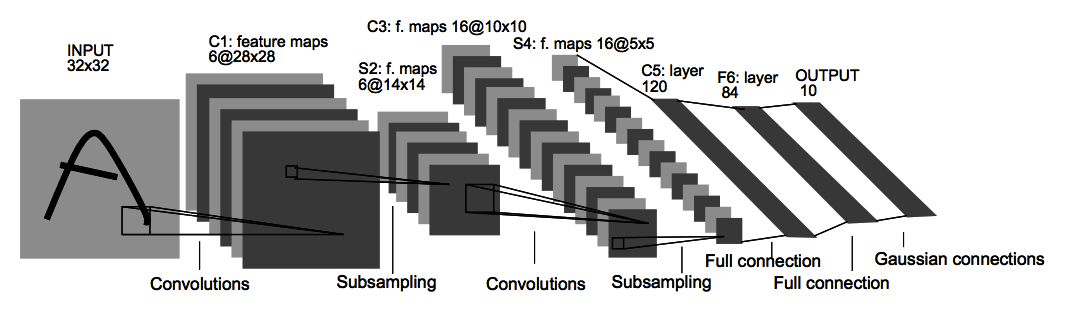

The model was changed in order to be usable for this classification task. 
- The input now takes RGB images, so the input size of the first convolution layer is 32x32x3. 
- The last convolution layer with output 1x1x120 was eliminated and the output of the last pooling layer with output 5x5x16 was transformed into an array in order to be processed by the first fully connected layer.
- The output of the convolution layer with output size 5x5x16 was flattened to a vector of 400 values.
- A new fully connected layer was added to process the 400 values of the flattened vector and give out 120. These two steps are kind of equivalent to the convolution layer with output size 1x1x120, but with this approach it is easier to separate between the convolutional part of the network and the fully connected part.
- The output is now of size 43, which is the quantity of classes for this dataset.

The activation functions where changed from hyperbolic tangent (tanh) to ReLU for two reasons:

- With a lot of layers, the tanh function can cause the gradient to vanish (make it very close to 0), since its derivative is always smaller than 1. That multiplied a lot of times will result on a very little gradient for the layers close to the input. 
- Using ReLU is more computationally efficient since it only consists of determine the maximum value between 0 and the output of the layer. Also its derivative is either 0 or 1.

In order to avoid overfitting (that the neural network learns so well the training data and has problems while working with new data), dropout is used for the fully connected layer after the convolutional part of the network.

So, the new network arquitecture looks like following:

- Convolution layer with input size 32x32x3 and output size 28x28x6. Kernel size of 5x5 and stride of 1. 
- Average pooling layer with input size 28x28x6 and output size 14x14x6. Kernel size of 2x2 and stride of 2.
- Convolution layer with input size 14x14x6 and output size 10x10x16. Kernel size of 5x5 and stride of 1.
- Average pooling layer with input size of 10x10x16 and output size of 5x5x16. Kernel size of 2x2 and stride of 2.
- Flatten operation from the output of the last pooling layer with input size of 5x5x16 and output size of 400.
- Fully connected layer with input size of 400 and output size of 120. Dropout used while training. 
- Fully connected layer with input size of 120 and output size of 84. Dropout used while training.
- Fully connected layer with input size of 84 and output size of 10.

The function "LeNet_V1" implements this network on tensorflow. This function is saved in the file "LeNetV1.py"

In [5]:
# Imports tensorflow
import tensorflow as tf
from LeNetV1 import LeNet_V1


/mnt/data/ProgramFiles/Anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


Let's print the shape of the output of this function in order to see if the dimensions are correct. They should be 34799x43.

In [6]:
print(LeNet_V1(normTrainData_X, 0.75))

Tensor("Add_2:0", shape=(34799, 43), dtype=float32)


It can be seen that the dimensions are as wanted. The function returns 34799 vectors of 43 values corresponding to the probabilities of an image being each of the 43 traffic signs.

### Define input data to the network

Here are defined three TensorFlow placeholders to be used later on the TensorFlow session. 

- X: Corresponds to the input images used for training, validation and test.
- Y: Corresponds to the labels of the images used for training, validation and test.
- keepProb: Corresponds to the probability to keep a node of the two deep fully connected layers of the network where dropout is used.

In [7]:
X = tf.placeholder(tf.float32, (None, 32, 32, 3))
Y = tf.placeholder(tf.int32, (None))
keepProb = tf.placeholder(tf.float32)

# It is important to convert the label data to one hot before doing training with it, since Y and the output 
# of LeNet_V1 need to have the same shape.
Y_oneHot = tf.one_hot(Y, 43)

### Hyperparameters

Here are declared the three most important hyperparameters used for the training. They will be tunned in order to get the best validation accuracy.

In [8]:
EPOCHS = 10
BATCH_SIZE = 128
LEARNING_RATE = 0.001
DROPOUT_KEEP_PROB = 0.5

### Training pipeline

In this section it is defined, how the network will be trained. 

For optimization, instead of using the traditional stochastic gradient descent algorithm which only uses the gradient of all parameters and the learning rate, the Adam Algorithm was used.  

The Adam Algorithm described by Diederik Kingma and Jimmy Lei Ba on their 2015 paper "Adam : A method for stochastic optimization" does not use directly the gradient in order to change the parameters. Instead, it uses the first and second moment of the gradients in order to create an update term for the parameters which changes through the time. This algorithm has gained a good acceptance in the last years and is seen as the first option when working with big deep neural networks.

In [16]:
nnOut = LeNet_V1(X, keepProb)
crossEntropy = tf.nn.softmax_cross_entropy_with_logits(labels = Y_oneHot, logits = nnOut)
loss = tf.reduce_mean(crossEntropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
trainingOperation = optimizer.minimize(loss)

### Validation
For validation, the accuracy operation is defined:

In [17]:
correctPrediction = tf.equal(tf.argmax(nnOut, 1), tf.argmax(Y_oneHot, 1))
accuracyOperation = tf.reduce_mean(tf.cast(correctPrediction, tf.float32))

### Training

Now that the model is selected, together with the optimizer, it is time to train it and see how well it performs. 
This cell also logs the training loss, the training accuracy and the validation accuracy every 50 batches in order to plot them afterwards.

In [18]:
from sklearn.utils import shuffle
from tqdm import tqdm
import math

initializer = tf.global_variables_initializer()

# Some variables to plot
logBatchStep = 50
batches = []
lossBatch = []
trainAccBatch = []
validAccBatch = []
lastTrainAcc = 0
lastValidAcc = 0
lastLoss = 0

with tf.Session() as session:
    session.run(initializer)
    batchCount = int(np.ceil(len(normTrainData_X)/BATCH_SIZE))
    
    for epoch_i in range(EPOCHS):
        # Shuffles the data so it does not make the same sequence for every epoch
        normTrainData_X, trainData_y = shuffle(normTrainData_X, trainData_y)
        # Progress bar:
        barDesc = 'Epoch {:>2}/{}'.format(epoch_i+1, EPOCHS)
        batchesPbar = tqdm(range(batchCount), desc= barDesc, unit='batches')  
        
        # Initializes training accuracy at start of every batch
        trainingAccBatchSum = 0 
        
        # Training cycle
        for batch_i in batchesPbar:
            # Get the batch of training features and labels
            batchStart = batch_i*BATCH_SIZE
            batchEnd = batchStart + BATCH_SIZE
            batchData_X = normTrainData_X[batchStart:batchEnd]
            batchData_y = trainData_y[batchStart:batchEnd]
            
            # Runs the optimizer and saves the loss on batchLoss
            trainingFeedDict = {X: batchData_X, Y: batchData_y, keepProb : DROPOUT_KEEP_PROB}
            _ , batchLoss = session.run([trainingOperation, loss], feed_dict= trainingFeedDict)
            
            # Calculates accuracy of the current batch in order to get training accuracy
            trainingAccFeedDict = {X: batchData_X, Y: batchData_y, keepProb : 1.0}
            batchTrainAcc = session.run(accuracyOperation, feed_dict = trainingAccFeedDict)
            trainingAccBatchSum += batchTrainAcc
            
            logBatchStep = 50
            # Logs every 50 batches
            if not ((epoch_i*len(batchesPbar) + batch_i) % logBatchStep):
                # Calculates training accuracy based on the executed batches
                lastTrainAcc = trainingAccBatchSum / (batch_i + 1)
                # Calculates validation accuracy
                validationAccFeedDict = {X: normValidationData_X, Y: validationData_y, keepProb : 1.0}
                lastValidAcc = session.run(accuracyOperation, feed_dict = validationAccFeedDict)
                batchesPbar.set_description('Epoch {:>2}/{} | Loss: {:.2f} | Train Acc.: {:.2f} | Val. Acc.: {:.2f}'
                                            .format(epoch_i+1, EPOCHS, batchLoss, lastTrainAcc, lastValidAcc))
                batchesPbar.refresh()
                
                # Log data in order to print it afterwards
                batches.append(epoch_i*len(batchesPbar) + batch_i)
                lossBatch.append(batchLoss)
                trainAccBatch.append(lastTrainAcc)
                validAccBatch.append(lastValidAcc)
            
            


Epoch  1/10 | Loss: 1.72 | Train Acc.: 0.41 | Val. Acc.: 0.59: 100%|██████████| 272/272 [00:26<00:00, 12.44batches/s]
Epoch  2/10 | Loss: 0.90 | Train Acc.: 0.77 | Val. Acc.: 0.79: 100%|██████████| 272/272 [00:24<00:00, 11.00batches/s]
Epoch  3/10 | Loss: 0.79 | Train Acc.: 0.89 | Val. Acc.: 0.85: 100%|██████████| 272/272 [00:25<00:00, 11.47batches/s]
Epoch  4/10 | Loss: 0.54 | Train Acc.: 0.93 | Val. Acc.: 0.89: 100%|██████████| 272/272 [00:25<00:00, 10.65batches/s]
Epoch  5/10 | Loss: 0.63 | Train Acc.: 0.95 | Val. Acc.: 0.90: 100%|██████████| 272/272 [00:25<00:00, 10.53batches/s]
Epoch  6/10 | Loss: 0.25 | Train Acc.: 0.96 | Val. Acc.: 0.92: 100%|██████████| 272/272 [00:26<00:00, 10.35batches/s]
Epoch  7/10 | Loss: 0.42 | Train Acc.: 0.97 | Val. Acc.: 0.93: 100%|██████████| 272/272 [00:25<00:00,  7.01batches/s]
Epoch  8/10 | Loss: 0.28 | Train Acc.: 0.98 | Val. Acc.: 0.93: 100%|██████████| 272/272 [00:24<00:00, 12.88batches/s]
Epoch  9/10 | Loss: 0.38 | Train Acc.: 0.98 | Val. Acc.:

The model performed very well reaching a training accuracy of 98% and a validation accuracy of 94%. In the next cells these results are analyzed more deeply.

### Analysis of training loss, training accuracy and validation accuracy.

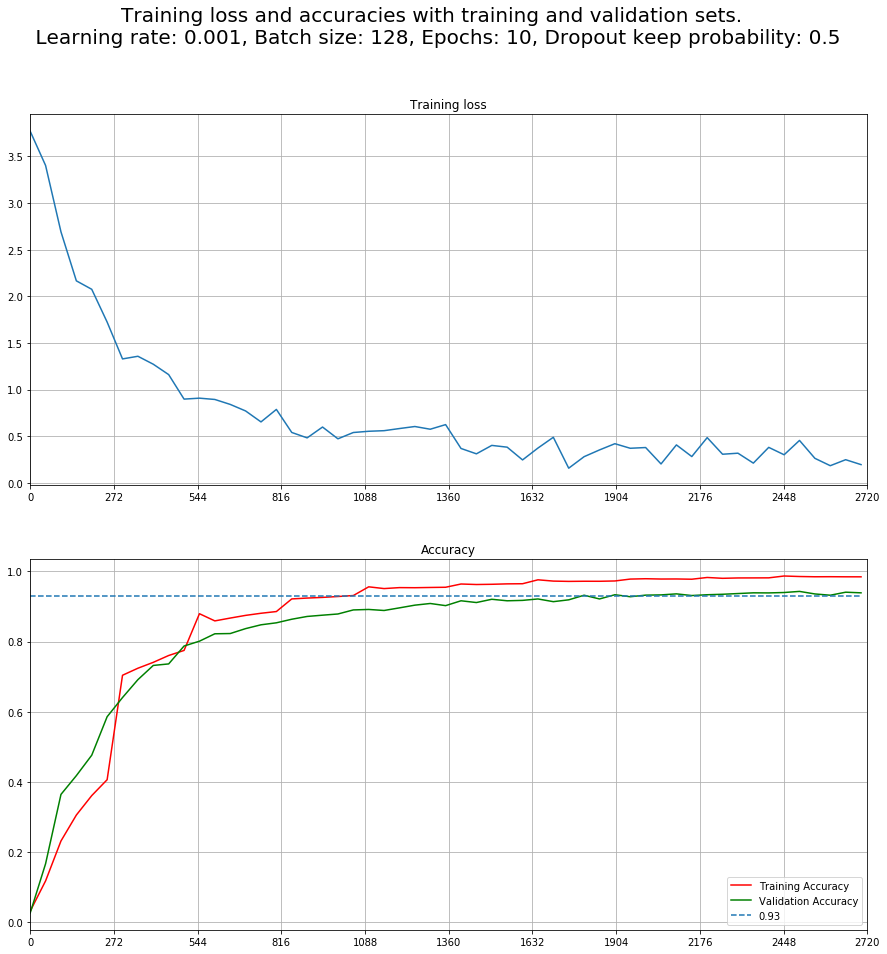

In [19]:
figure5, fig5_axes = plt.subplots(2, 1, figsize =(15,15))
figure5title = "Training loss and accuracies with training and validation sets. \n Learning rate: " + \
                str(LEARNING_RATE) + ", Batch size: " + str(BATCH_SIZE) + ", Epochs: " + str(EPOCHS) + \
                ", Dropout keep probability: " + str(DROPOUT_KEEP_PROB)
figure5.suptitle(figure5title, fontsize = 20)
fig5_axes[0].plot(batches, lossBatch)
fig5_axes[0].set_xticks(np.arange(0, EPOCHS*len(batchesPbar) + len(batchesPbar), step = len(batchesPbar)))
fig5_axes[0].grid()
fig5_axes[0].set_xlim(0, EPOCHS*len(batchesPbar))
fig5_axes[0].set_title('Training loss')
fig5_axes[1].plot(batches, trainAccBatch, 'r', label = 'Training Accuracy')
fig5_axes[1].plot(batches, validAccBatch, 'g', label = 'Validation Accuracy')
fig5_axes[1].plot(batches, np.full_like(batches, 0.93, dtype = np.float32), '--', label = '0.93')
fig5_axes[1].set_xticks(np.arange(0, EPOCHS*len(batchesPbar) + len(batchesPbar), step = len(batchesPbar)))
fig5_axes[1].set_yticks(np.arange(0, 1 + 0.2, step = 0.2))
fig5_axes[1].set_xlim(0, EPOCHS*len(batchesPbar))
fig5_axes[1].legend(loc = 'lower right')
fig5_axes[1].grid()
fig5_axes[1].set_title('Accuracy')
figure5.savefig('ImgsReport/05_LeNetV1TrainingResults01')

From the two graphics it can be seen that the network with the given hyperparameters does the biggest part of the training during the first five epochs. At the end of the fifth epoch it reaches already a validation accuracy of 90%. In the next five epochs the validation accuracy grows very slowly but steady. It also can be seen from the loss function that the model was still getting better when the training ended, which can mean that a bigger number of epochs would result in an even higher validation accuracy. 

### Generalized function for training

In order to be able to change the hyperparameters easily and show the results here. Let's create a function which executes the training and extract the data, so the new sessions do not have so many code lines. This function is called "trainNetwork" and is saved in the file "LeNetV1.py".

In [20]:
import sys, importlib
importlib.reload(sys.modules['LeNetV1'])
from LeNetV1 import trainNetwork

### Training with 5 more epochs

In [21]:
# Increase EPOCHS by 5
EPOCHS = 15

initializer = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(initializer)
    outputLists = trainNetwork(normTrainData_X, trainData_y, normValidationData_X, validationData_y, 
                               trainingOperation, loss, accuracyOperation, X, Y, keepProb, 
                               epochs = EPOCHS, batchSize = BATCH_SIZE, dropoutKeepProb = DROPOUT_KEEP_PROB)
        
    batches_2 = outputLists[0]
    lossBatch_2 = outputLists[1] 
    trainAccBatch_2 = outputLists[2] 
    validAccBatch_2 = outputLists[3]

Epoch  1/15 | Loss: 1.99 | Train Acc.: 0.34 | Val. Acc.: 0.48: 100%|██████████| 272/272 [00:25<00:00, 10.83batches/s]
Epoch  2/15 | Loss: 1.12 | Train Acc.: 0.67 | Val. Acc.: 0.73: 100%|██████████| 272/272 [00:25<00:00, 10.80batches/s]
Epoch  3/15 | Loss: 1.02 | Train Acc.: 0.85 | Val. Acc.: 0.82: 100%|██████████| 272/272 [00:26<00:00, 11.58batches/s]
Epoch  4/15 | Loss: 0.76 | Train Acc.: 0.91 | Val. Acc.: 0.86: 100%|██████████| 272/272 [00:26<00:00, 12.42batches/s]
Epoch  5/15 | Loss: 0.60 | Train Acc.: 0.93 | Val. Acc.: 0.88: 100%|██████████| 272/272 [00:27<00:00,  9.81batches/s]
Epoch  6/15 | Loss: 0.48 | Train Acc.: 0.95 | Val. Acc.: 0.89: 100%|██████████| 272/272 [00:31<00:00, 12.13batches/s]
Epoch  7/15 | Loss: 0.42 | Train Acc.: 0.96 | Val. Acc.: 0.90: 100%|██████████| 272/272 [00:36<00:00,  7.44batches/s]
Epoch  8/15 | Loss: 0.38 | Train Acc.: 0.97 | Val. Acc.: 0.92: 100%|██████████| 272/272 [00:38<00:00,  9.89batches/s]
Epoch  9/15 | Loss: 0.39 | Train Acc.: 0.97 | Val. Acc.:

In [22]:
### Analysis of training loss, training accuracy and validation accuracy with 5 more epochs.

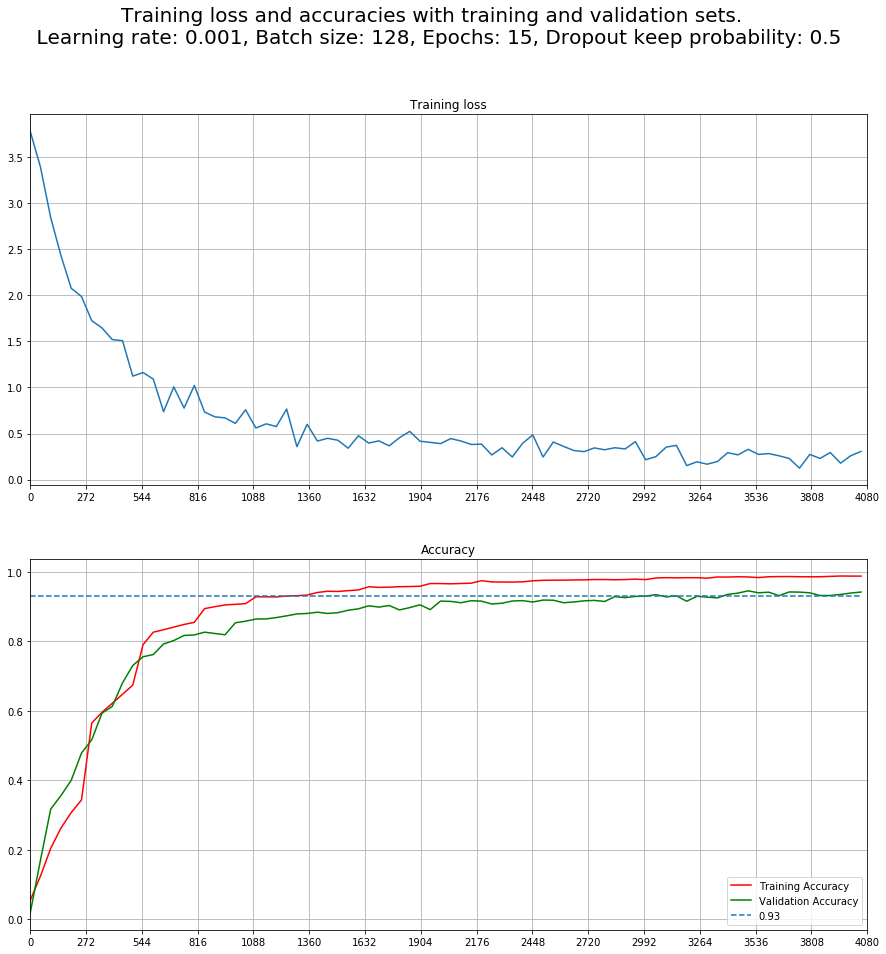

In [23]:
batchLength = np.ceil(len(normTrainData_X)/BATCH_SIZE)

figure6, fig6_axes = plt.subplots(2, 1, figsize =(15,15))
figure6title = "Training loss and accuracies with training and validation sets. \n Learning rate: " + \
                str(LEARNING_RATE) + ", Batch size: " + str(BATCH_SIZE) + ", Epochs: " + str(EPOCHS) + \
                ", Dropout keep probability: " + str(DROPOUT_KEEP_PROB)
figure6.suptitle(figure6title, fontsize = 20)
fig6_axes[0].plot(batches_2, lossBatch_2)
fig6_axes[0].set_xticks(np.arange(0, EPOCHS*batchLength + batchLength, step = batchLength))
fig6_axes[0].grid()
fig6_axes[0].set_xlim(0, EPOCHS*batchLength)
fig6_axes[0].set_title('Training loss')
fig6_axes[1].plot(batches_2, trainAccBatch_2, 'r', label = 'Training Accuracy')
fig6_axes[1].plot(batches_2, validAccBatch_2, 'g', label = 'Validation Accuracy')
fig6_axes[1].plot(batches_2, np.full_like(batches_2, 0.93, dtype = np.float32), '--', label = '0.93')
fig6_axes[1].set_xticks(np.arange(0, EPOCHS*batchLength + batchLength, step = batchLength))
fig6_axes[1].set_yticks(np.arange(0, 1 + 0.2, step = 0.2))
fig6_axes[1].set_xlim(0, EPOCHS*batchLength)
fig6_axes[1].legend(loc = 'lower right')
fig6_axes[1].grid()
fig6_axes[1].set_title('Accuracy')
figure6.savefig('ImgsReport/06_LeNetV1TrainingResults02')

By looking at the new graphics, it can be seen that the performance of the network didn't really improved by increasing the number of epochs. The last validation accuracy was also of 94%, which means that with the given learning rate, the network converges to a solution within the first 10 epochs. 

Let's try decreasing the learning rate a bit and keep the epochs by 10. Decreasing the learning rate should make the convergence of the network slower, but it makes it possible that the performance increases a bit.

In [24]:
EPOCHS = 10
BATCH_SIZE = 128
LEARNING_RATE = 0.0007
DROPOUT_KEEP_PROB = 0.5

initializer = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(initializer)
    outputLists = trainNetwork(normTrainData_X, trainData_y, normValidationData_X, validationData_y, 
                               trainingOperation, loss, accuracyOperation, X, Y, keepProb, 
                               epochs = EPOCHS, batchSize = BATCH_SIZE, dropoutKeepProb = DROPOUT_KEEP_PROB)
        
    batches_3 = outputLists[0]
    lossBatch_3 = outputLists[1] 
    trainAccBatch_3 = outputLists[2] 
    validAccBatch_3 = outputLists[3]

Epoch  1/10 | Loss: 1.91 | Train Acc.: 0.37 | Val. Acc.: 0.53: 100%|██████████| 272/272 [00:28<00:00,  9.61batches/s]
Epoch  2/10 | Loss: 1.17 | Train Acc.: 0.73 | Val. Acc.: 0.75: 100%|██████████| 272/272 [00:33<00:00, 10.28batches/s]
Epoch  3/10 | Loss: 0.96 | Train Acc.: 0.87 | Val. Acc.: 0.84: 100%|██████████| 272/272 [00:39<00:00,  6.95batches/s]
Epoch  4/10 | Loss: 0.68 | Train Acc.: 0.91 | Val. Acc.: 0.86: 100%|██████████| 272/272 [00:35<00:00,  7.66batches/s]
Epoch  5/10 | Loss: 0.44 | Train Acc.: 0.94 | Val. Acc.: 0.90: 100%|██████████| 272/272 [00:34<00:00,  7.99batches/s]
Epoch  6/10 | Loss: 0.42 | Train Acc.: 0.95 | Val. Acc.: 0.91: 100%|██████████| 272/272 [00:33<00:00,  8.22batches/s]
Epoch  7/10 | Loss: 0.39 | Train Acc.: 0.96 | Val. Acc.: 0.91: 100%|██████████| 272/272 [00:36<00:00,  6.88batches/s]
Epoch  8/10 | Loss: 0.39 | Train Acc.: 0.97 | Val. Acc.: 0.93: 100%|██████████| 272/272 [00:35<00:00,  8.26batches/s]
Epoch  9/10 | Loss: 0.28 | Train Acc.: 0.97 | Val. Acc.:

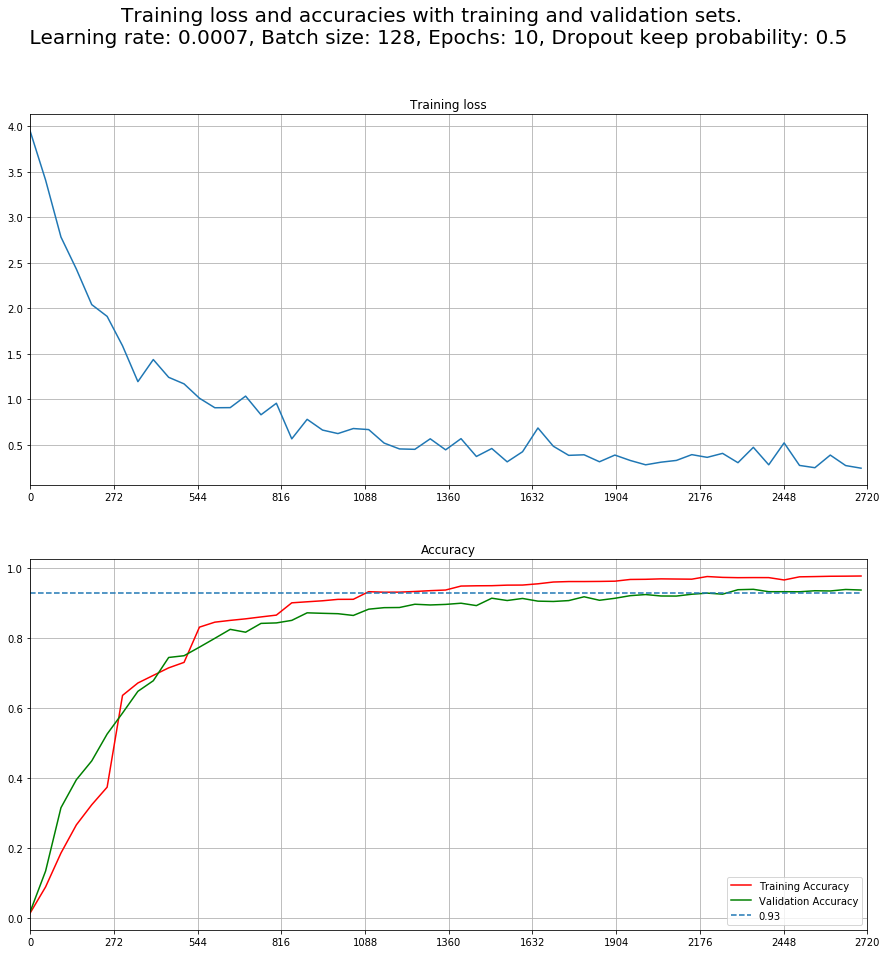

In [25]:
batchLength = np.ceil(len(normTrainData_X)/BATCH_SIZE)

figure7, fig7_axes = plt.subplots(2, 1, figsize =(15,15))
figure7title = "Training loss and accuracies with training and validation sets. \n Learning rate: " + \
                str(LEARNING_RATE) + ", Batch size: " + str(BATCH_SIZE) + ", Epochs: " + str(EPOCHS) + \
                ", Dropout keep probability: " + str(DROPOUT_KEEP_PROB)
figure7.suptitle(figure7title, fontsize = 20)
fig7_axes[0].plot(batches_3, lossBatch_3)
fig7_axes[0].set_xticks(np.arange(0, EPOCHS*batchLength + batchLength, step = batchLength))
fig7_axes[0].grid()
fig7_axes[0].set_xlim(0, EPOCHS*batchLength)
fig7_axes[0].set_title('Training loss')
fig7_axes[1].plot(batches_3, trainAccBatch_3, 'r', label = 'Training Accuracy')
fig7_axes[1].plot(batches_3, validAccBatch_3, 'g', label = 'Validation Accuracy')
fig7_axes[1].plot(batches_3, np.full_like(batches_3, 0.93, dtype = np.float32), '--', label = '0.93')
fig7_axes[1].set_xticks(np.arange(0, EPOCHS*batchLength + batchLength, step = batchLength))
fig7_axes[1].set_yticks(np.arange(0, 1 + 0.2, step = 0.2))
fig7_axes[1].set_xlim(0, EPOCHS*batchLength)
fig7_axes[1].legend(loc = 'lower right')
fig7_axes[1].grid()
fig7_axes[1].set_title('Accuracy')
figure7.savefig('ImgsReport/07_LeNetV1TrainingResults03')

Decreasing the learning rate did not improve the performance of the network, it actually decreased it a little bit (from 94% to 93%). 

Since the adam optimizer is being used, which decreases the learning rate through time, it may be a better option to increase it a bit. Let's set it to 0.002.

In [26]:
EPOCHS = 10
BATCH_SIZE = 128
LEARNING_RATE = 0.002
DROPOUT_KEEP_PROB = 0.5

initializer = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(initializer)
    outputLists = trainNetwork(normTrainData_X, trainData_y, normValidationData_X, validationData_y, 
                               trainingOperation, loss, accuracyOperation, X, Y, keepProb, 
                               epochs = EPOCHS, batchSize = BATCH_SIZE, dropoutKeepProb = DROPOUT_KEEP_PROB)
        
    batches_4 = outputLists[0]
    lossBatch_4 = outputLists[1] 
    trainAccBatch_4 = outputLists[2] 
    validAccBatch_4 = outputLists[3]

Epoch  1/10 | Loss: 1.74 | Train Acc.: 0.36 | Val. Acc.: 0.49: 100%|██████████| 272/272 [00:38<00:00,  5.44batches/s]
Epoch  2/10 | Loss: 1.08 | Train Acc.: 0.72 | Val. Acc.: 0.74: 100%|██████████| 272/272 [00:37<00:00,  7.33batches/s]
Epoch  3/10 | Loss: 0.77 | Train Acc.: 0.86 | Val. Acc.: 0.84: 100%|██████████| 272/272 [00:37<00:00,  9.47batches/s]
Epoch  4/10 | Loss: 0.70 | Train Acc.: 0.91 | Val. Acc.: 0.87: 100%|██████████| 272/272 [00:34<00:00, 10.61batches/s]
Epoch  5/10 | Loss: 0.47 | Train Acc.: 0.94 | Val. Acc.: 0.89: 100%|██████████| 272/272 [00:36<00:00,  7.39batches/s]
Epoch  6/10 | Loss: 0.72 | Train Acc.: 0.95 | Val. Acc.: 0.91: 100%|██████████| 272/272 [00:37<00:00,  7.22batches/s]
Epoch  7/10 | Loss: 0.47 | Train Acc.: 0.96 | Val. Acc.: 0.92: 100%|██████████| 272/272 [00:35<00:00,  4.33batches/s]
Epoch  8/10 | Loss: 0.58 | Train Acc.: 0.97 | Val. Acc.: 0.92: 100%|██████████| 272/272 [00:34<00:00,  7.91batches/s]
Epoch  9/10 | Loss: 0.37 | Train Acc.: 0.97 | Val. Acc.:

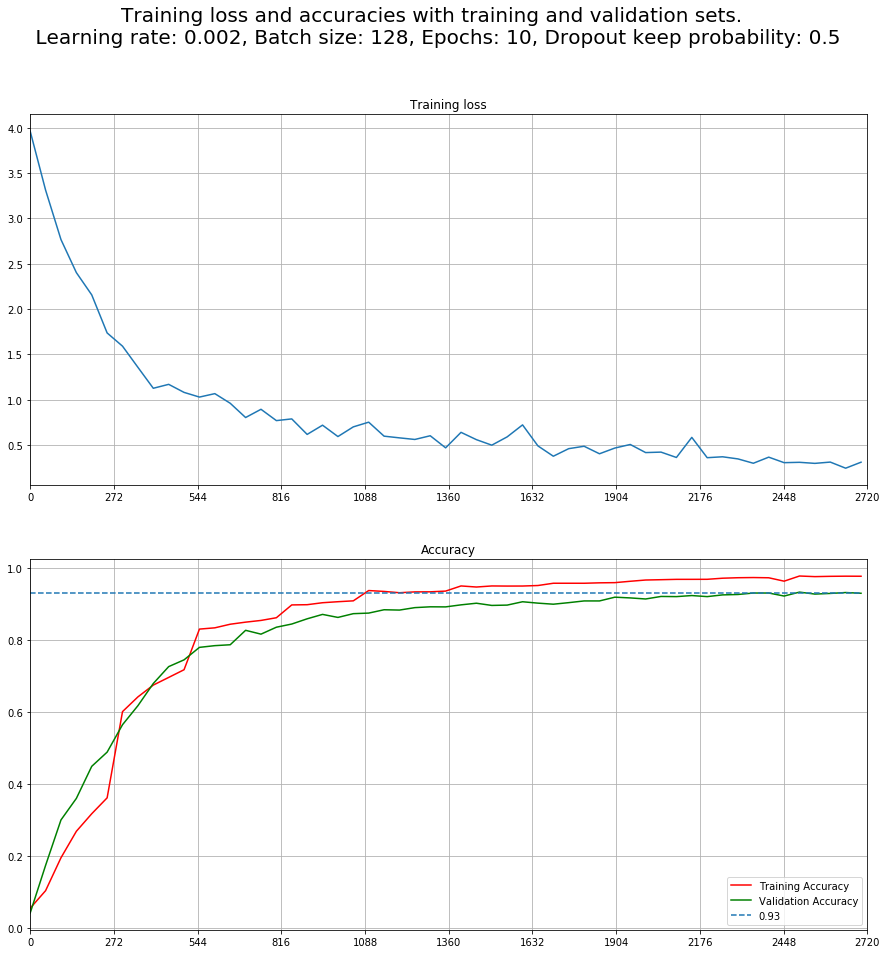

In [27]:
batchLength = np.ceil(len(normTrainData_X)/BATCH_SIZE)

figure8, fig8_axes = plt.subplots(2, 1, figsize =(15,15))
figure8title = "Training loss and accuracies with training and validation sets. \n Learning rate: " + \
                str(LEARNING_RATE) + ", Batch size: " + str(BATCH_SIZE) + ", Epochs: " + str(EPOCHS) + \
                ", Dropout keep probability: " + str(DROPOUT_KEEP_PROB)
figure8.suptitle(figure8title, fontsize = 20)
fig8_axes[0].plot(batches_4, lossBatch_4)
fig8_axes[0].set_xticks(np.arange(0, EPOCHS*batchLength + batchLength, step = batchLength))
fig8_axes[0].grid()
fig8_axes[0].set_xlim(0, EPOCHS*batchLength)
fig8_axes[0].set_title('Training loss')
fig8_axes[1].plot(batches_4, trainAccBatch_4, 'r', label = 'Training Accuracy')
fig8_axes[1].plot(batches_4, validAccBatch_4, 'g', label = 'Validation Accuracy')
fig8_axes[1].plot(batches_4, np.full_like(batches_3, 0.93, dtype = np.float32), '--', label = '0.93')
fig8_axes[1].set_xticks(np.arange(0, EPOCHS*batchLength + batchLength, step = batchLength))
fig8_axes[1].set_yticks(np.arange(0, 1 + 0.2, step = 0.2))
fig8_axes[1].set_xlim(0, EPOCHS*batchLength)
fig8_axes[1].legend(loc = 'lower right')
fig8_axes[1].grid()
fig8_axes[1].set_title('Accuracy')
figure8.savefig('ImgsReport/08_LeNetV1TrainingResults04')

Increasing the learning rate to 0.002 clearly decreased the performance of the model. It looks like the best learning rate for this model using the Adam optimizer is 0.001. Also it looks like that the model will not get better by changing the hyperparameters. But what about creating a bigger model?. 

### Improved model

The model until now is almost the same used by Yann LeCunn to clasify hand written numbers. Now we are working with images with more information where color is also a factor, and also there are more labels, so it seems logic to make a bigger model than Yenn LeCunn's.

Let's define the network arquitecture like following:

- Convolution layer with input size 32x32x3 and output size 32x32x10. Kernel size of 5x5 and stride of 1. 
- Max pooling layer with input size 32x32x10 and output size 16x16x10. Kernel size of 2x2 and stride of 2.
- Convolution layer with input size 16x16x10 and output size 16x16x18. Kernel size of 4x4 and stride of 1.
- Max pooling layer with input size of 16x16x18 and output size of 8x8x18. Kernel size of 2x2 and stride of 2.
- Convolution layer with input size of 8x8x18 and output size of 6x6x30. Kernel size of 3x3 and stride of 1.
- Concatenation between second convolutional layer (16x16x18) and third convolutional layer (6x6x30) resulting on a
  vector of 16x16x18 + 6x6x30 = 5688 parameters.
- Fully connected layer with input size of 5688 and output size of 1890. Dropout used while training. 
- Fully connected layer with input size of 1890 and output size of 630. Dropout used while training
- Fully connected layer with input size of 630 and output size of 200. Dropout used while training.
- Fully connected layer with input size of 200 and output size of 43.

The last neural network had 64811 parameters, this new one will have 140638 which is more than double as much as the last neural network. 2367822

The new function is called "LeNet_Improved" and is located in the file "LeNetV1.py"

In [9]:
import sys, importlib
importlib.reload(sys.modules['LeNetV1'])
from LeNetV1 import LeNet_Improved
from LeNetV1 import trainNetwork

print(LeNet_Improved(normTrainData_X, 0.75))

Tensor("Add_5:0", shape=(34799, 43), dtype=float32)


### Training pipeline for improved model

In [10]:
EPOCHS = 10
BATCH_SIZE = 128
LEARNING_RATE = 0.001
DROPOUT_KEEP_PROB = 0.5

nnOut_Imp = LeNet_Improved(X, keepProb)
crossEntropy_Imp = tf.nn.softmax_cross_entropy_with_logits(labels = Y_oneHot, logits = nnOut_Imp)
lossOperation_Imp = tf.reduce_mean(crossEntropy_Imp)
optimizer_Imp = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
trainingOperation_Imp = optimizer_Imp.minimize(lossOperation_Imp)

correctPrediction_Imp = tf.equal(tf.argmax(nnOut_Imp, 1), tf.argmax(Y_oneHot, 1))
accuracyOperation_Imp = tf.reduce_mean(tf.cast(correctPrediction_Imp, tf.float32))

### Training of improved model

In [11]:
initializer = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(initializer)
    outputLists = trainNetwork(normTrainData_X, trainData_y, normValidationData_X, validationData_y, 
                               trainingOperation_Imp, lossOperation_Imp, accuracyOperation_Imp, X, Y, keepProb, 
                               epochs = EPOCHS, batchSize = BATCH_SIZE, dropoutKeepProb = DROPOUT_KEEP_PROB)
        
    batches_Imp = outputLists[0]
    lossBatch_Imp = outputLists[1] 
    trainAccBatch_Imp = outputLists[2] 
    validAccBatch_Imp = outputLists[3]

Epoch  1/10 | Loss: 0.93 | Train Acc.: 0.52 | Val. Acc.: 0.73: 100%|██████████| 272/272 [00:50<00:00,  6.27batches/s]
Epoch  2/10 | Loss: 0.47 | Train Acc.: 0.91 | Val. Acc.: 0.87: 100%|██████████| 272/272 [00:57<00:00,  6.38batches/s]
Epoch  3/10 | Loss: 0.25 | Train Acc.: 0.97 | Val. Acc.: 0.92: 100%|██████████| 272/272 [01:05<00:00,  6.62batches/s]
Epoch  4/10 | Loss: 0.17 | Train Acc.: 0.98 | Val. Acc.: 0.91: 100%|██████████| 272/272 [01:04<00:00,  6.55batches/s]
Epoch  5/10 | Loss: 0.14 | Train Acc.: 0.99 | Val. Acc.: 0.92: 100%|██████████| 272/272 [00:55<00:00,  2.93batches/s]
Epoch  6/10 | Loss: 0.15 | Train Acc.: 0.99 | Val. Acc.: 0.93: 100%|██████████| 272/272 [01:00<00:00,  6.58batches/s]
Epoch  7/10 | Loss: 0.11 | Train Acc.: 1.00 | Val. Acc.: 0.94: 100%|██████████| 272/272 [00:53<00:00,  3.37batches/s]
Epoch  8/10 | Loss: 0.09 | Train Acc.: 1.00 | Val. Acc.: 0.93: 100%|██████████| 272/272 [01:00<00:00,  6.41batches/s]
Epoch  9/10 | Loss: 0.06 | Train Acc.: 1.00 | Val. Acc.:

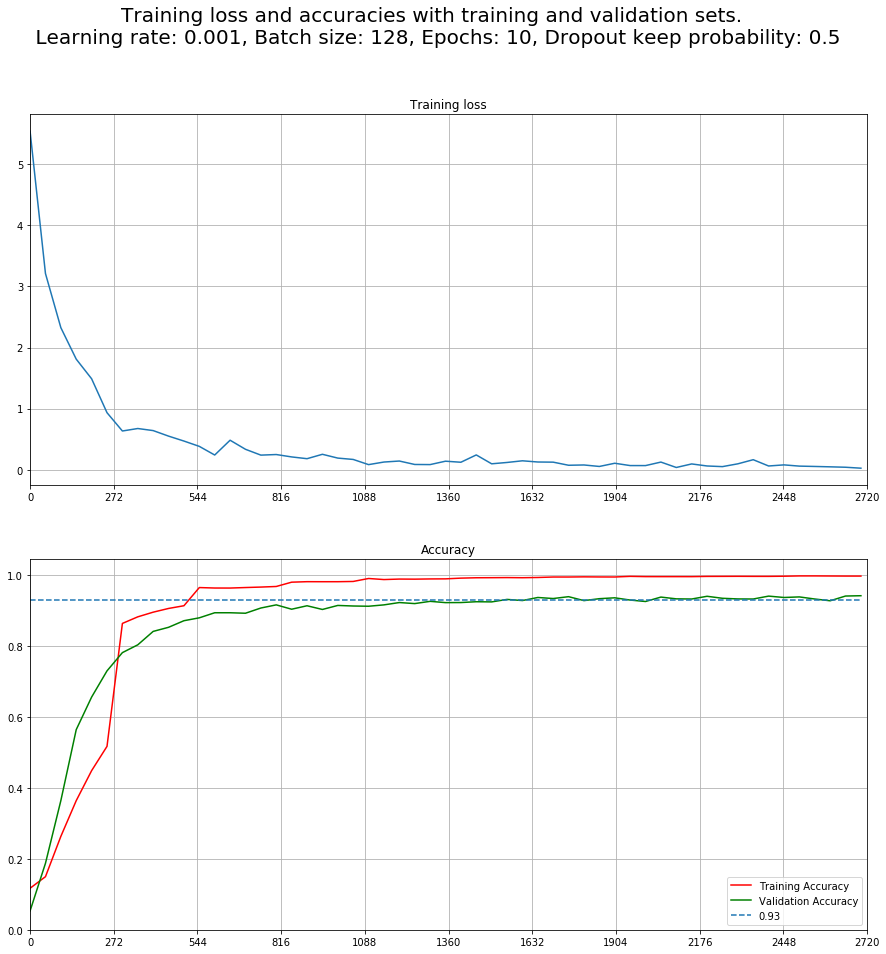

In [12]:
batchLength = np.ceil(len(normTrainData_X)/BATCH_SIZE)

figure9, fig9_axes = plt.subplots(2, 1, figsize =(15,15))
figure9title = "Training loss and accuracies with training and validation sets. \n Learning rate: " + \
                str(LEARNING_RATE) + ", Batch size: " + str(BATCH_SIZE) + ", Epochs: " + str(EPOCHS) + \
                ", Dropout keep probability: " + str(DROPOUT_KEEP_PROB)
figure9.suptitle(figure9title, fontsize = 20)
fig9_axes[0].plot(batches_Imp, lossBatch_Imp)
fig9_axes[0].set_xticks(np.arange(0, EPOCHS*batchLength + batchLength, step = batchLength))
fig9_axes[0].grid()
fig9_axes[0].set_xlim(0, EPOCHS*batchLength)
fig9_axes[0].set_title('Training loss')
fig9_axes[1].plot(batches_Imp, trainAccBatch_Imp, 'r', label = 'Training Accuracy')
fig9_axes[1].plot(batches_Imp, validAccBatch_Imp, 'g', label = 'Validation Accuracy')
fig9_axes[1].plot(batches_Imp, np.full_like(batches_Imp, 0.93, dtype = np.float32), '--', label = '0.93')
fig9_axes[1].set_xticks(np.arange(0, EPOCHS*batchLength + batchLength, step = batchLength))
fig9_axes[1].set_yticks(np.arange(0, 1 + 0.2, step = 0.2))
fig9_axes[1].set_xlim(0, EPOCHS*batchLength)
fig9_axes[1].legend(loc = 'lower right')
fig9_axes[1].grid()
fig9_axes[1].set_title('Accuracy')
figure9.savefig('ImgsReport/09_LeNetImprovedTrainingResults01')

It can be seen that this network performs sightly better with a validation accuracy of 94% and sometimes of 95%. It also converges way faster than the first network and the training accuracy reaches 100%. Let's decrease the learning rate to 0.0005 to see what happens.

More interesting is the training accuracy, which is notably higher than the last model reaching 99% already on the sixth epoch, this can mean that the model is overfitting, which can be reduced decreasing the dropout keep probability. Let's reduce it to 35%.

In [14]:
EPOCHS = 10
BATCH_SIZE = 128
LEARNING_RATE = 0.0005
DROPOUT_KEEP_PROB = 0.5

In [15]:
initializer = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(initializer)
    outputLists = trainNetwork(normTrainData_X, trainData_y, normValidationData_X, validationData_y, 
                               trainingOperation_Imp, lossOperation_Imp, accuracyOperation_Imp, X, Y, keepProb, 
                               epochs = EPOCHS, batchSize = BATCH_SIZE, dropoutKeepProb = DROPOUT_KEEP_PROB)
        
    batches_Imp_2 = outputLists[0]
    lossBatch_Imp_2 = outputLists[1] 
    trainAccBatch_Imp_2 = outputLists[2] 
    validAccBatch_Imp_2 = outputLists[3]

Epoch  1/10 | Loss: 1.17 | Train Acc.: 0.52 | Val. Acc.: 0.76: 100%|██████████| 272/272 [00:57<00:00,  6.82batches/s]
Epoch  2/10 | Loss: 0.44 | Train Acc.: 0.92 | Val. Acc.: 0.88: 100%|██████████| 272/272 [01:01<00:00,  4.57batches/s]
Epoch  3/10 | Loss: 0.29 | Train Acc.: 0.97 | Val. Acc.: 0.92: 100%|██████████| 272/272 [01:01<00:00,  5.84batches/s]
Epoch  4/10 | Loss: 0.18 | Train Acc.: 0.98 | Val. Acc.: 0.93: 100%|██████████| 272/272 [01:05<00:00,  3.56batches/s]
Epoch  5/10 | Loss: 0.10 | Train Acc.: 0.99 | Val. Acc.: 0.93: 100%|██████████| 272/272 [01:07<00:00,  5.40batches/s]
Epoch  6/10 | Loss: 0.08 | Train Acc.: 0.99 | Val. Acc.: 0.94: 100%|██████████| 272/272 [00:53<00:00,  6.51batches/s]
Epoch  7/10 | Loss: 0.07 | Train Acc.: 1.00 | Val. Acc.: 0.95: 100%|██████████| 272/272 [00:55<00:00,  3.17batches/s]
Epoch  8/10 | Loss: 0.10 | Train Acc.: 1.00 | Val. Acc.: 0.95: 100%|██████████| 272/272 [00:56<00:00,  6.69batches/s]
Epoch  9/10 | Loss: 0.05 | Train Acc.: 1.00 | Val. Acc.:

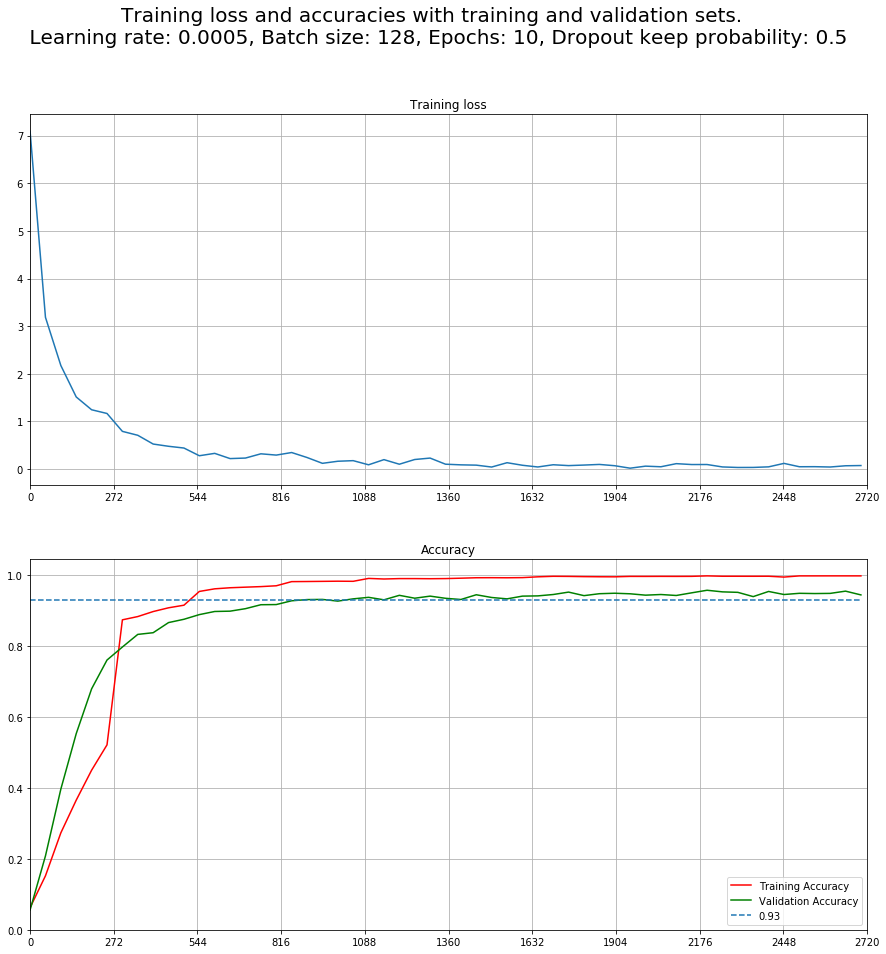

In [16]:
batchLength = np.ceil(len(normTrainData_X)/BATCH_SIZE)

figure10, fig10_axes = plt.subplots(2, 1, figsize =(15,15))
figure10title = "Training loss and accuracies with training and validation sets. \n Learning rate: " + \
                str(LEARNING_RATE) + ", Batch size: " + str(BATCH_SIZE) + ", Epochs: " + str(EPOCHS) + \
                ", Dropout keep probability: " + str(DROPOUT_KEEP_PROB)
figure10.suptitle(figure10title, fontsize = 20)
fig10_axes[0].plot(batches_Imp_2, lossBatch_Imp_2)
fig10_axes[0].set_xticks(np.arange(0, EPOCHS*batchLength + batchLength, step = batchLength))
fig10_axes[0].grid()
fig10_axes[0].set_xlim(0, EPOCHS*batchLength)
fig10_axes[0].set_title('Training loss')
fig10_axes[1].plot(batches_Imp_2, trainAccBatch_Imp_2, 'r', label = 'Training Accuracy')
fig10_axes[1].plot(batches_Imp_2, validAccBatch_Imp_2, 'g', label = 'Validation Accuracy')
fig10_axes[1].plot(batches_Imp_2, np.full_like(batches_Imp_2, 0.93, dtype = np.float32), '--', label = '0.93')
fig10_axes[1].set_xticks(np.arange(0, EPOCHS*batchLength + batchLength, step = batchLength))
fig10_axes[1].set_yticks(np.arange(0, 1 + 0.2, step = 0.2))
fig10_axes[1].set_xlim(0, EPOCHS*batchLength)
fig10_axes[1].legend(loc = 'lower right')
fig10_axes[1].grid()
fig10_axes[1].set_title('Accuracy')
figure10.savefig('ImgsReport/09_LeNetImprovedTrainingResults01')

Decreasing the learning rate to 0.0005 really improved the performance of the model. Now it achieves a steady validation accuracy of 95% and even reached 96% once. However, it is only 1% more. It seems that the performance will not get any better without changing the data. 